Exploring a dataset of suicides from 101 countries form 1987 to 2015
this code originally falls into ML-Clustering catagory but i wanted it to be an independent repository because it's a level above other Clusters i've done so far

In [371]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
import plotly.graph_objs as go
%matplotlib inline

In [372]:
#reading the dataset
df=pd.read_csv(r'C:\Users\user\Downloads\master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [373]:
df["tuned_sex"]=df["sex"].replace({"male":1,"female":0})

In [374]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,tuned_sex
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1


In [375]:
df.shape

(27820, 13)

In [376]:
#turning the str data to numeric data in case we needed the gender related data later
from sklearn import preprocessing
le_age = preprocessing.LabelEncoder()
le_age.fit(["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"])
df["tuned_age"] = le_age.transform(df["age"]) 

df[0:5]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,tuned_sex,tuned_age
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1,2
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,5
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1,1


<AxesSubplot: xlabel='age', ylabel='suicides_no'>

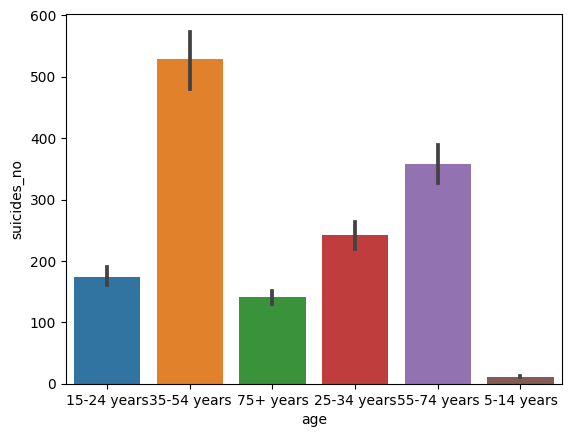

In [377]:
sns.barplot(x=df["age"],y=df["suicides_no"],data=df)

As you could see above Suicide rate increases by age but starts to decrease after 50

In [378]:
#creating an age based dataframe to use it for further plotting and visualization
age_based_df=df.groupby("tuned_age")["suicides_no","age"].sum()
#this line of code put all suicides based on the age of the deceased

C:\Users\user\AppData\Local\Temp\ipykernel_16972\180459005.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp\ipykernel_16972\180459005.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Now we will create an interactive pie chart using plotly from the dataframe we just created

In [379]:
#naming each group 
labels =["15-24","25-34","35-54","5-14","55-74","+75"]
#defining the values used in the pie chart 
values = age_based_df["suicides_no"]
#visualizating the chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.show()

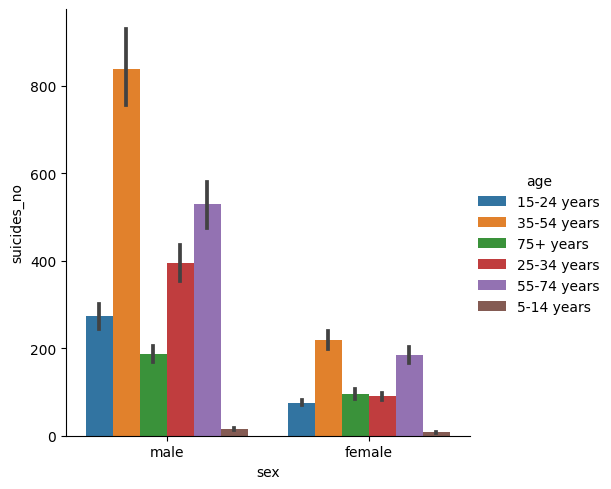

In [380]:
#using seaborn library
sns.catplot(
    data=df,x="sex",y="suicides_no",hue="age",kind="bar"
)

This part shows that not only men are the main victims of suicide,but men between the age of 35-54 are in much more danger compared to others

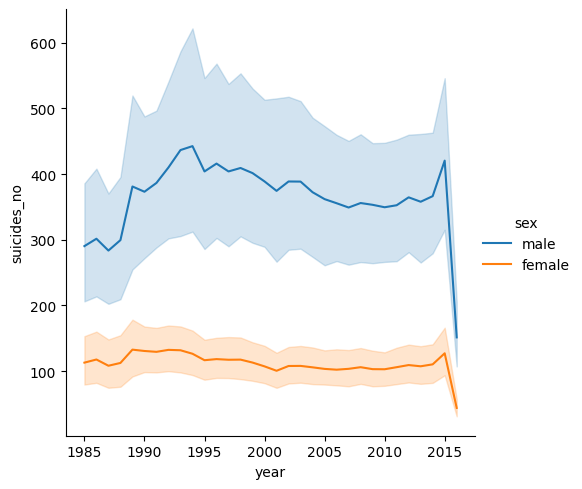

In [381]:
#creating a linear replot to compare the number of suicides each year,men and women
sns.relplot(data=df, x="year", y="suicides_no",hue="sex", kind="line")

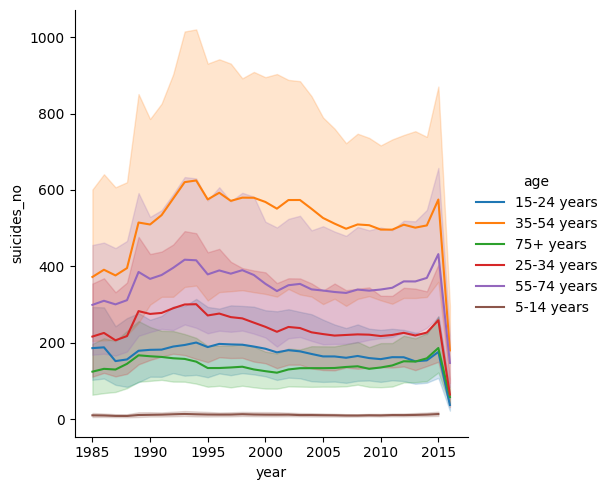

In [382]:
#comparing based on age group
sns.relplot(data=df, x="year", y="suicides_no",hue="age", kind="line")

<AxesSubplot: xlabel='generation', ylabel='suicides_no'>

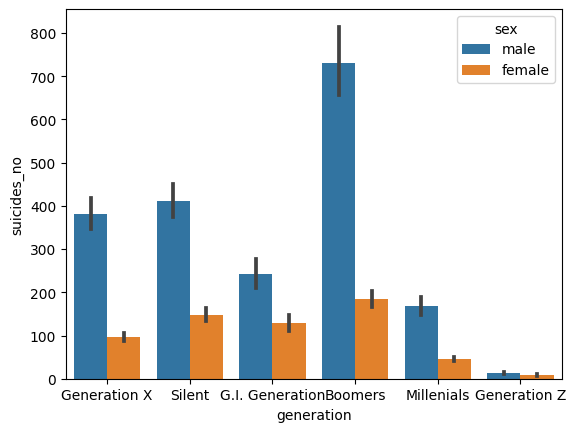

In [383]:
sns.barplot(data=df,x="generation",y="suicides_no",hue="sex")

In [384]:
#creating a dataframe that only shows a summation of data for each country,not seperated by year or sex or generation
grouped_df = df.groupby(['country'])['suicides_no'].sum()
# Convert the resulting Series back to a DataFrame
grouped_df = grouped_df.reset_index()

In [385]:
#sorting the dataframe based on maximum number of suicides to minimum
grouped_df=grouped_df.sort_values(by='suicides_no',ascending=False)
grouped_df

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
...,...,...
55,Maldives,20
1,Antigua and Barbuda,11
79,San Marino,4
76,Saint Kitts and Nevis,0


As you saw above,the 3 countries of Russia,USA and Japan hold the highest number of suicide records,however further down the line i will do another group by to sort countries based on the percentage of people that have committed suicide,seperating the countries with high suicide percentage and countries with high suicide commits

Now we will compare the suicide rates of 3 countries

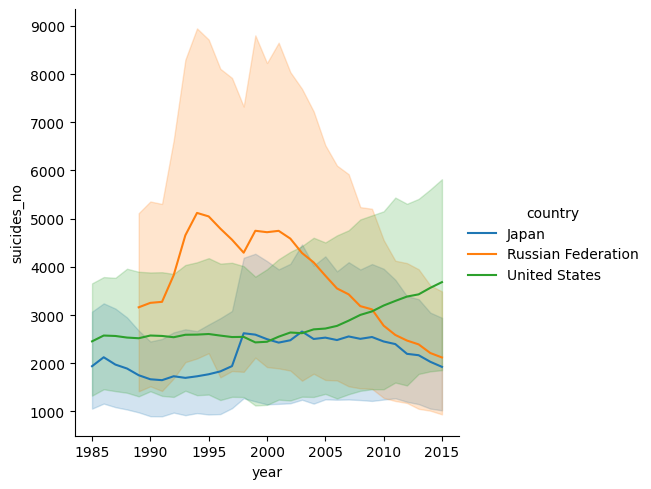

In [386]:
df_sum = df.groupby('country')['suicides_no'].sum().reset_index()

# Get the top 3 countries with the highest suicides count
top_3_countries = df_sum.nlargest(3, 'suicides_no')['country'].tolist()

# Filter out all other countries
df_top_3 = df[df['country'].isin(top_3_countries)]

# Create a relplot for compariosn
sns.relplot(x='year', y='suicides_no', hue='country', kind='line', data=df_top_3)


It showed that however Russia had higher rates of suicide,its rate is declining,same as Japan and unlike US

Now we will proceed to create a world map from the dataset using folium library and world countries json file that i've politrly borrowed from python-visualization(the file,web address and everything is in the repository)

In [387]:
#changing the name of RF to Russia so it apeears on the map
grouped_df['country'].replace({'Russian Federation': 'Russia'}, inplace=True)

In [388]:
#i've tried few methods but none of them worked and i couldn't plot the US data on the map
map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data='C:\\Users\\user\\Downloads\\world-countries.json',
    name='choropleth',
    data=grouped_df,
    columns=['country', 'suicides_no'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Suicide Rates'
).add_to(map)
folium.LayerControl().add_to(map)
map


Now,as i promised earlier,we will create a dataframe about suicide percentage,so we'll understand which countries truly have high suicide rates and which countries have high suicide rates because of high population

In [389]:
#creating the dataframe
pop_df=df.groupby("country")["population","suicides_no"].sum()
#creating a suicide percentage column
pop_df["death_ratio"]=(pop_df["suicides_no"]/pop_df["population"])
#converting the dataframe to avoid future errors and bugs
pop_df=pop_df.reset_index()
#sorting the countries based on suicide percentage
pop_df=pop_df.sort_values(by="death_ratio",ascending=False)
#changing Russia's name like before for map plotting
pop_df["country"].replace({"Russian Federation" : "Russia"},inplace=True)
pop_df[0:20]

C:\Users\user\AppData\Local\Temp\ipykernel_16972\2737129255.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,population,suicides_no,death_ratio
52,Lithuania,68085210,28039,0.000412
75,Russia,3690802620,1209742,0.000328
87,Sri Lanka,182525626,55641,0.000305
11,Belarus,197372292,59892,0.000303
40,Hungary,248644256,73891,0.000297
51,Latvia,44852640,12770,0.000285
47,Kazakhstan,377513869,101546,0.000269
84,Slovenia,40268619,10615,0.000264
30,Estonia,27090810,7034,0.000260
95,Ukraine,1286469184,319950,0.000249


As you just witnessed,countries like Japan,France and US dropped significantly and countries like Lithuania rose drastically,the current high ranking countries are the real depressed countries 

In [390]:
#creating another world map,but this time it shows the real depressed countries with high suicide rates
map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data='C:\\Users\\user\\Downloads\\world-countries.json',
    name='choropleth',
    data=pop_df,
    columns=['country', 'death_ratio'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Death Rates'
).add_to(map)
folium.LayerControl().add_to(map)
map

In the final part we will use KMeans on certain parts of dataframe to cluster countries into different catagories

In [391]:
kdf=df.groupby('country')["suicides/100k pop","gdp_per_capita ($)"].mean()
kdf

C:\Users\user\AppData\Local\Temp\ipykernel_16972\556498322.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,suicides/100k pop,gdp_per_capita ($)
country,,
Albania,3.502879,1859.045455
Antigua and Barbuda,0.552901,10448.185185
Argentina,10.469328,7914.096774
Armenia,3.275872,1873.919463
Aruba,9.503095,24221.642857
...,...,...
United Arab Emirates,1.317917,42162.000000
United Kingdom,7.502473,31908.354839
United States,13.819812,39269.612903


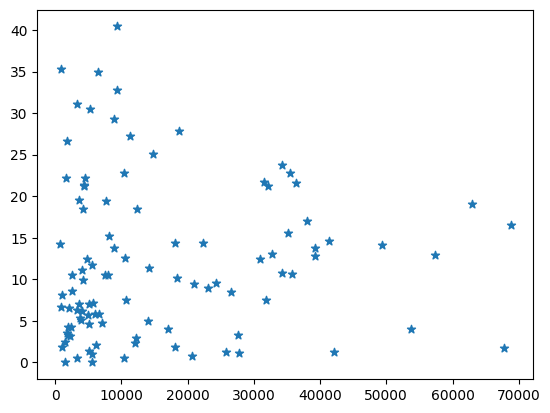

In [392]:
plt.scatter(kdf["gdp_per_capita ($)"],kdf["suicides/100k pop"],marker="*")

In [393]:
#normalizing the data to use in KMeans
from sklearn.preprocessing import StandardScaler
x=kdf.values[:,:]
scaler=StandardScaler()
sdf=scaler.fit_transform(x)
scaled_df=np.nan_to_num(sdf)
scaled_df

array([[-0.91775437, -0.86383329],
       [-1.23539515, -0.33646787],
       [-0.16763737, -0.49205861],
       [-0.94219743, -0.86292004],
       [-0.27167711,  0.50920998],
       [ 0.10407975,  1.03446433],
       [ 1.26341914,  1.12566533],
       [-1.09514594, -0.91626323],
       [-1.16061548,  0.60835407],
       [-1.09528481,  0.12963345],
       [-0.97508579, -0.22577667],
       [ 2.05119023, -0.77327826],
       [ 0.99187607,  0.99089197],
       [-0.6240425 , -0.73198371],
       [-0.79778167, -0.66622309],
       [-0.66545494, -0.6039654 ],
       [ 0.80357373, -0.75445768],
       [-0.09398664, -0.72476713],
       [ 0.04752641,  0.91848652],
       [-0.15980773, -0.51790961],
       [-0.71330982, -0.75024973],
       [-0.53111392, -0.66179008],
       [ 1.16387329, -0.34213593],
       [ 0.99016892, -0.7108193 ],
       [-0.94028909,  0.72082699],
       [ 0.69572961, -0.21849802],
       [ 0.22299174,  2.04899285],
       [-1.29492916, -0.88679934],
       [-0.61610649,

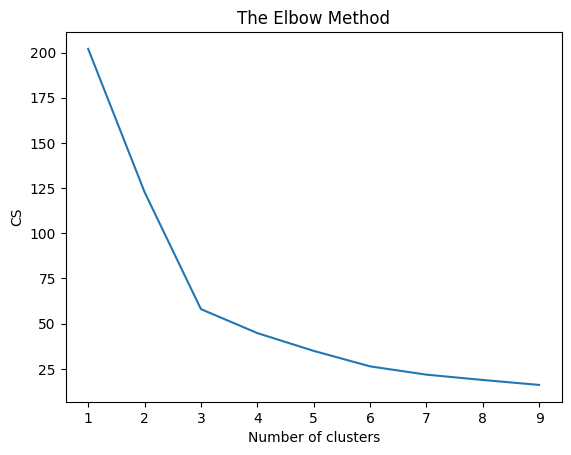

In [394]:
#The Elbow method to finding out an optimum number for clusters
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 9, random_state = 10)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

In [395]:
#implementing the KMeans on the normalized data
k_means=KMeans(init="k-means++",n_clusters=3,n_init=10)
k_means.fit(scaled_df)
labels=k_means.labels_
print(labels)

[0 0 0 0 0 1 1 0 0 0 0 2 1 0 0 0 2 0 1 0 0 0 2 2 0 2 1 0 0 0 2 0 1 1 0 1 0
 0 0 2 2 1 1 0 1 0 1 2 0 0 0 2 2 1 0 0 0 0 0 2 0 1 1 0 1 0 0 0 0 0 0 0 1 2
 0 2 0 0 0 1 2 0 1 0 2 0 0 2 2 1 1 0 0 0 0 2 1 1 1 2 0]


In [396]:
#adding the group numbers in the data frame
kdf["C_Group"]=labels
kdf

,suicides/100k pop,gdp_per_capita ($),C_Group
country,,,
Albania,3.502879,1859.045455,0
Antigua and Barbuda,0.552901,10448.185185,0
Argentina,10.469328,7914.096774,0
Armenia,3.275872,1873.919463,0
Aruba,9.503095,24221.642857,0
...,...,...,...
United Arab Emirates,1.317917,42162.000000,1
United Kingdom,7.502473,31908.354839,1
United States,13.819812,39269.612903,1


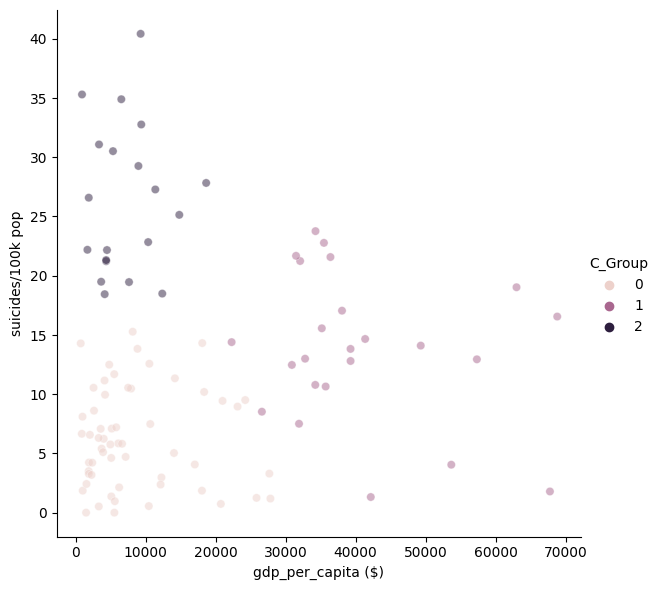

In [397]:
#and at last,visualizing the data using the seaborn library
sns.relplot(x="gdp_per_capita ($)", y="suicides/100k pop", hue="C_Group",
            alpha=.5,
            height=6, data=kdf)

This final visualization showed that countries with higher GDP per Capita have lesser suicide counts